In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [16]:
customer_data=pd.read_csv('Customers.csv')
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [17]:
product_data=pd.read_csv('Products.csv')
product_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [18]:
transaction_data=pd.read_csv('Transactions.csv')
transaction_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## EDA on Customer Data

In [19]:
customer_data.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

In [20]:
customer_data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [22]:
customer_data.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [25]:
region_counts = customer_data['Region'].value_counts()
print(region_counts)


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


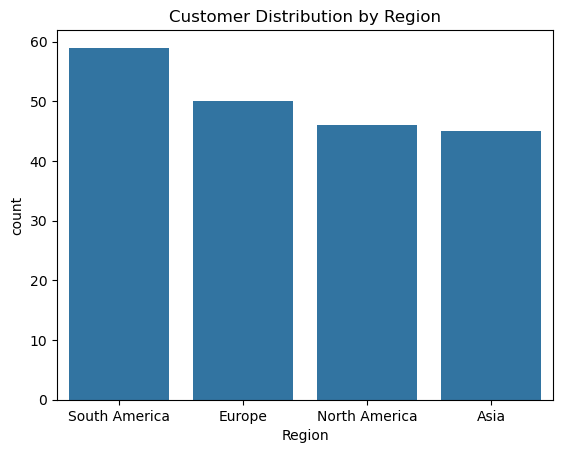

In [26]:
sns.countplot(data=customer_data, x='Region', order=region_counts.index)
plt.title('Customer Distribution by Region')
plt.show()

In [28]:
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'], format='%Y-%m-%d')
customer_data['SignupYear'] = customer_data['SignupDate'].dt.year
customer_data['SignupMonth'] = customer_data['SignupDate'].dt.month
customer_data['SignupDay'] = customer_data['SignupDate'].dt.day


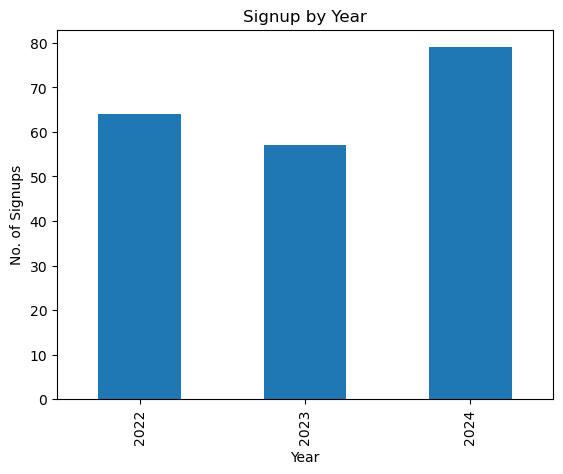

In [29]:
count = customer_data['SignupYear'].value_counts().sort_index()
count.plot(kind='bar', title='Signup by Year', xlabel='Year', ylabel='No. of Signups')
plt.show()

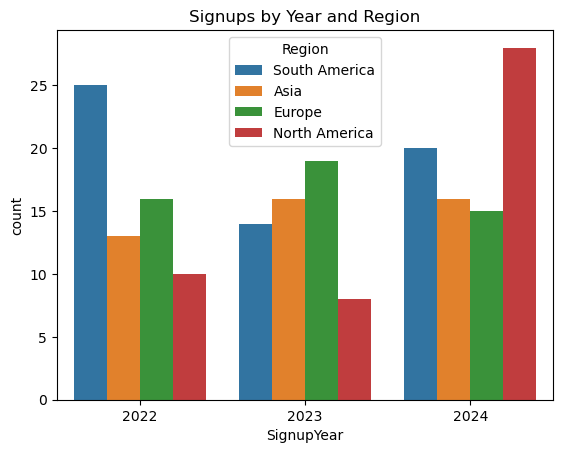

In [30]:
sns.countplot(data=customer_data, x='SignupYear', hue='Region')
plt.title('Signups by Year and Region')
plt.show()

## EDA on Product Data

In [31]:
product_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [32]:
product_data.nunique()

ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64

In [34]:
product_data.shape

(100, 4)

In [35]:
product_data.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [36]:
product_data.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [37]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


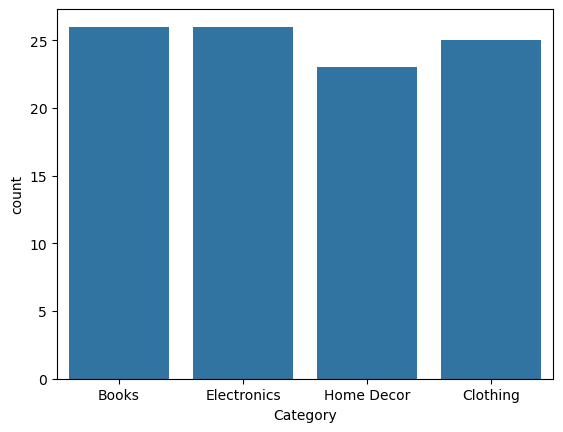

In [40]:
sns.countplot(x='Category', data=product_data)
plt.show()

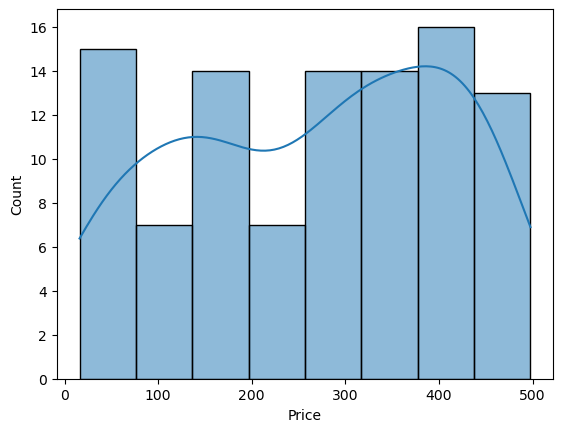

In [41]:
sns.histplot(product_data['Price'],kde=True)
plt.show()

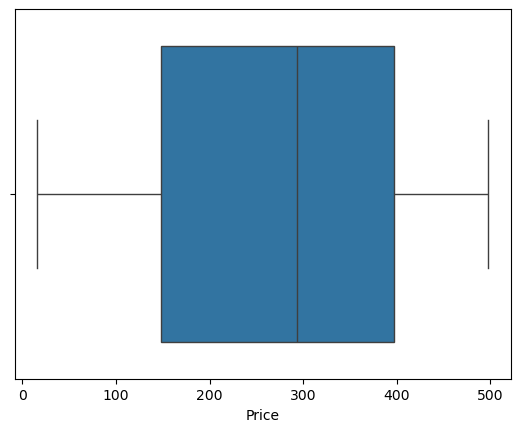

In [42]:

sns.boxplot(x=product_data['Price'])
plt.show()


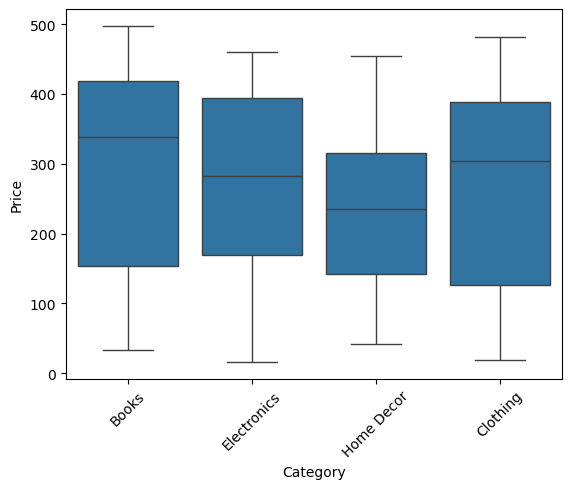

In [44]:
sns.boxplot(x='Category', y='Price', data=product_data)
plt.xticks(rotation=45)
plt.show()


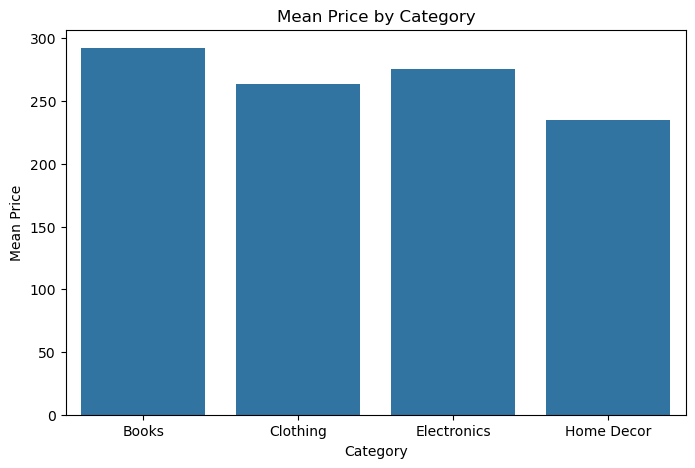

In [47]:
category_price_mean = product_data.groupby('Category')['Price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Price', data=category_price_mean)
plt.title('Mean Price by Category')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## EDA on Transaction Data

In [48]:
transaction_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [58]:
transaction_data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
Year               0
Month              0
Day                0
dtype: int64

In [49]:
merged_data = transaction_data.merge(customer_data, on='CustomerID', how='left')
merged_data = merged_data.merge(product_data, on='ProductID', how='left')


In [50]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYear,SignupMonth,SignupDay,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,3,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [52]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Extract year, month, and day into separate columns
merged_data['Year'] = merged_data['TransactionDate'].dt.year
merged_data['Month'] = merged_data['TransactionDate'].dt.month
merged_data['Day'] = merged_data['TransactionDate'].dt.day

In [53]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYear,SignupMonth,SignupDay,ProductName,Category,Price_y,Year,Month,Day
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,3,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8,25
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,4,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5,27
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,4,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4,25
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,26
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,21


In [54]:
merged_data=merged_data.rename(columns={
    "Year":"Transaction_Year",
    "Month":"Transaction_Month",
    "Day":"Transaction_Day"
})

In [55]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYear,SignupMonth,SignupDay,ProductName,Category,Price_y,Transaction_Year,Transaction_Month,Transaction_Day
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,3,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8,25
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,4,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5,27
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,4,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4,25
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,26
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,21


In [56]:
merged_data.drop('TransactionDate',axis=1,inplace=True)

In [57]:
merged_data.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYear,SignupMonth,SignupDay,ProductName,Category,Price_y,Transaction_Year,Transaction_Month,Transaction_Day
0,T00001,C0199,P067,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,3,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8,25
1,T00112,C0146,P067,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,4,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5,27
2,T00166,C0127,P067,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,4,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4,25
3,T00272,C0087,P067,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,26
4,T00363,C0070,P067,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,21


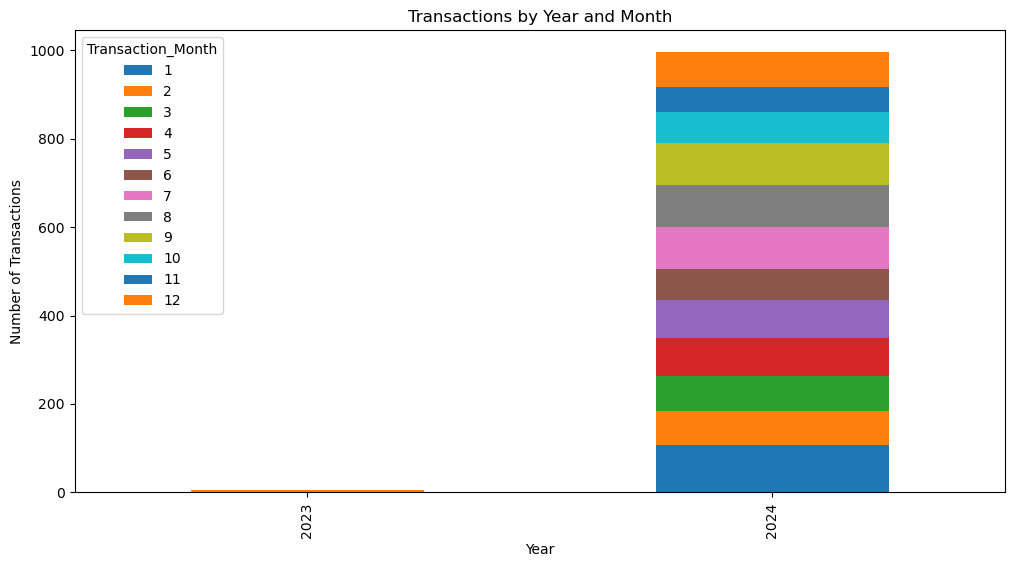

In [61]:

transaction = merged_data.groupby(['Transaction_Year', 'Transaction_Month']).size().unstack()
transaction.plot(kind='bar', stacked=True, title='Transactions by Year and Month', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


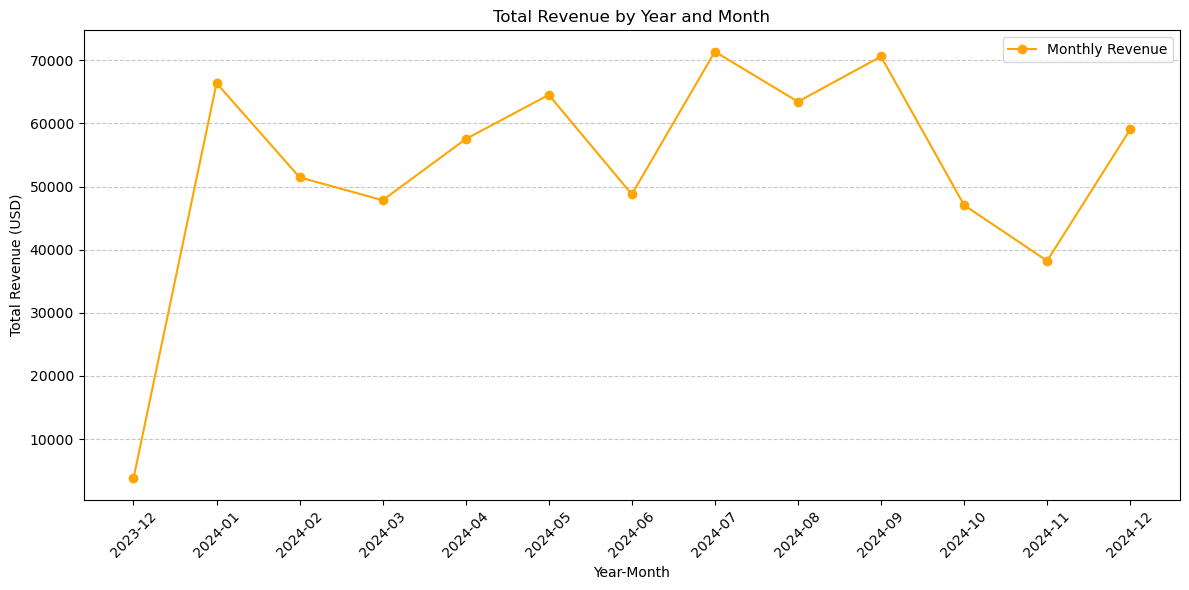

In [64]:

revenue_monthly = merged_data.groupby(['Transaction_Year', 'Transaction_Month'])['TotalValue'].sum()

revenue_monthly = revenue_monthly.reset_index()
revenue_monthly['Year_Month'] = revenue_monthly['Transaction_Year'].astype(str) + '-' + revenue_monthly['Transaction_Month'].astype(str).str.zfill(2)
plt.figure(figsize=(12, 6))
plt.plot(revenue_monthly['Year_Month'], revenue_monthly['TotalValue'], marker='o', color='orange', label='Monthly Revenue')
plt.title('Total Revenue by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


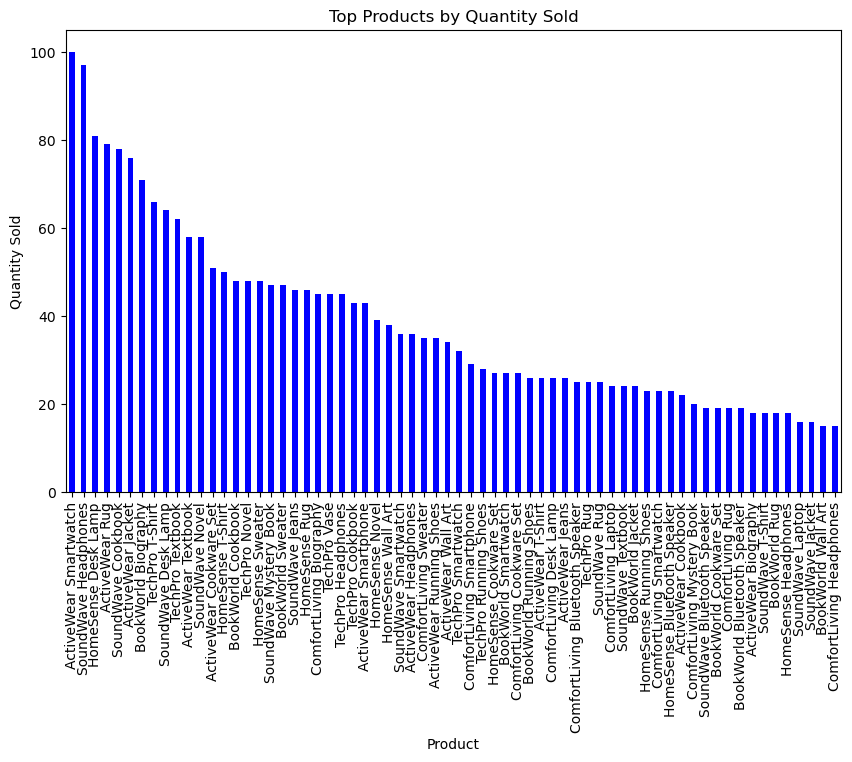

In [70]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title='Top Products by Quantity Sold', color='blue', figsize=(10, 6))
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()


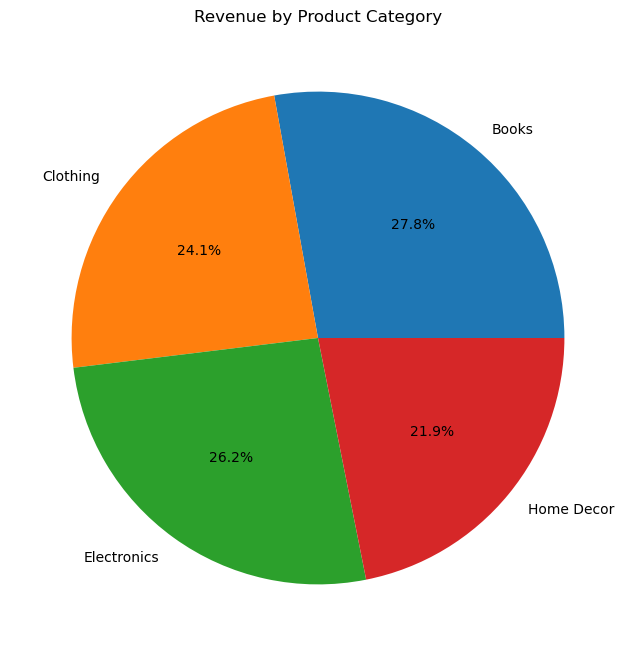

In [67]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='pie', title='Revenue by Product Category', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()


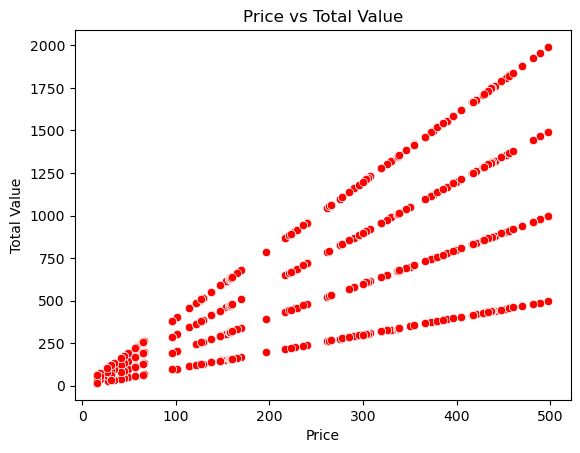

In [69]:
sns.scatterplot(x='Price_x', y='TotalValue', data=merged_data, color='red')
plt.title('Price vs Total Value')
plt.xlabel('Price')
plt.ylabel('Total Value')
plt.show()


In [71]:
merged_data.to_csv('Processed_Data.csv', index=False)
